Class
0    284315
1       492
Name: count, dtype: int64


/tmp/ipykernel_28857/616443474.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data["Class"], sort=True)


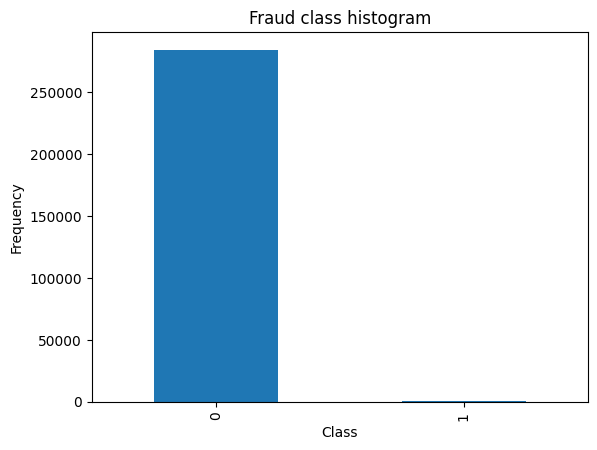

In [4]:
# 特征数量分析

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("creditcard.csv")
count_classes = pd.value_counts(data["Class"], sort=True)
print(count_classes)
count_classes.plot(kind="bar")
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

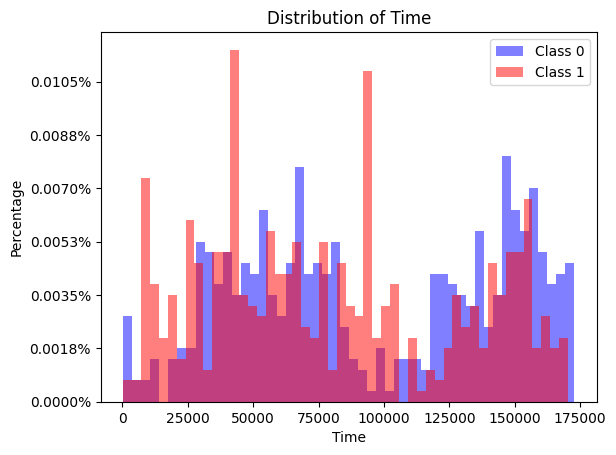

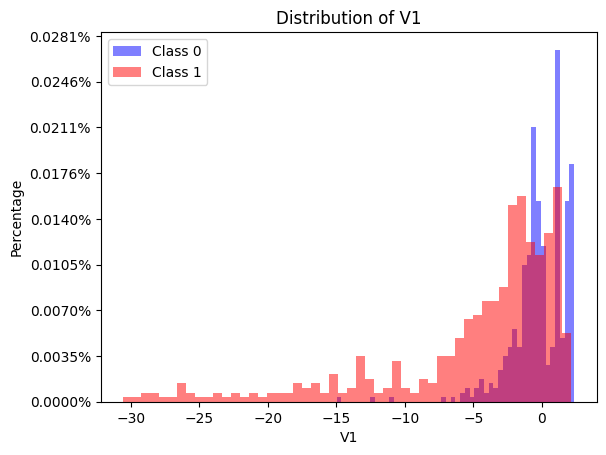

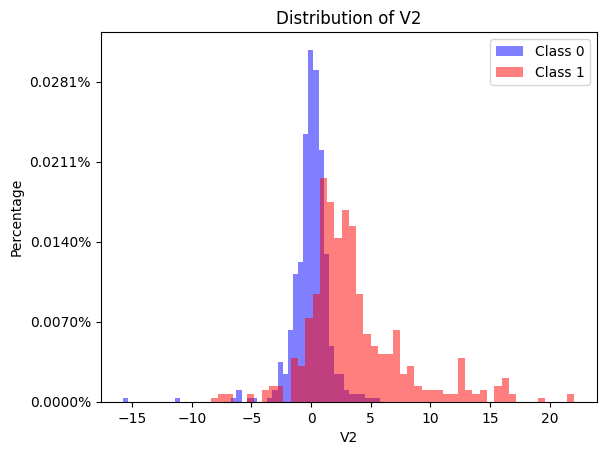

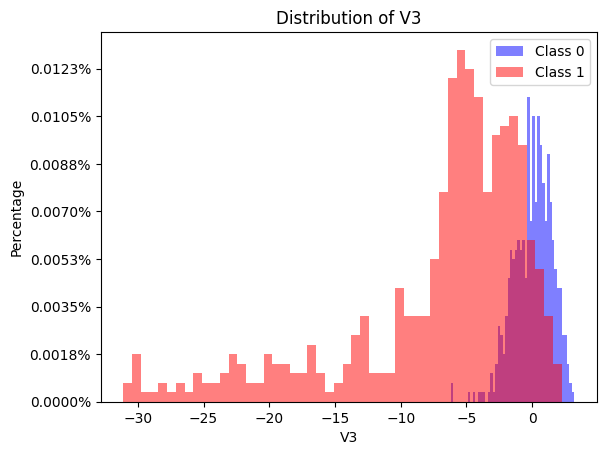

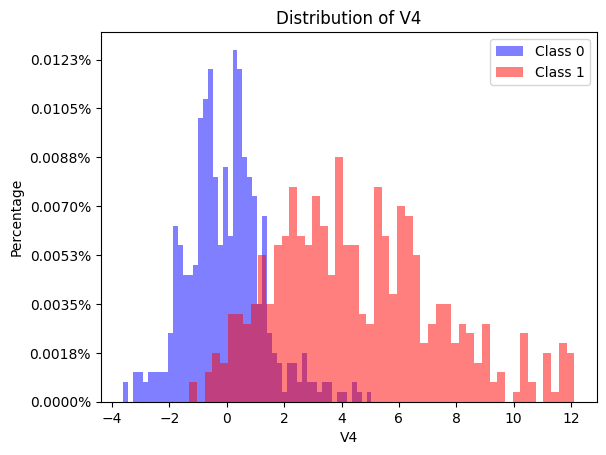

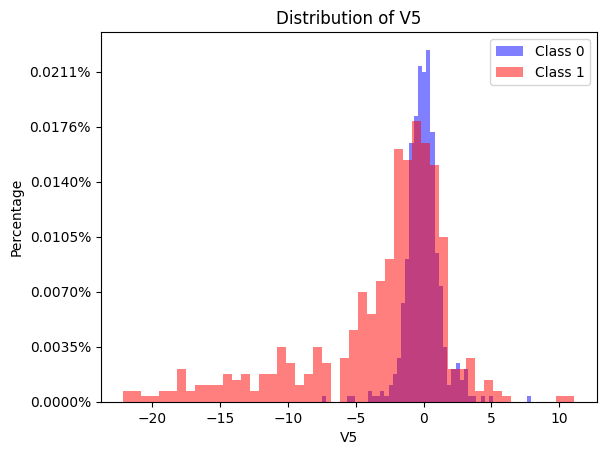

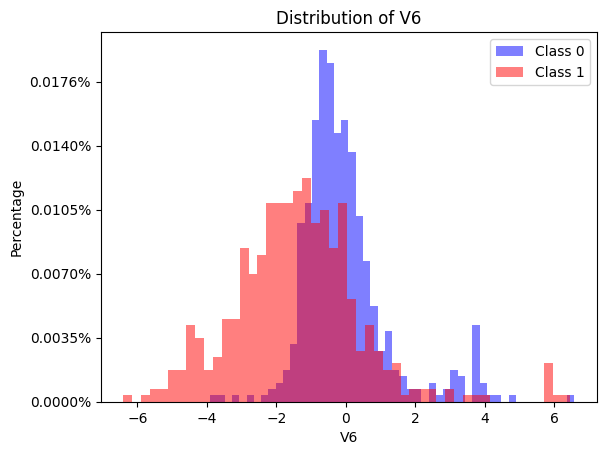

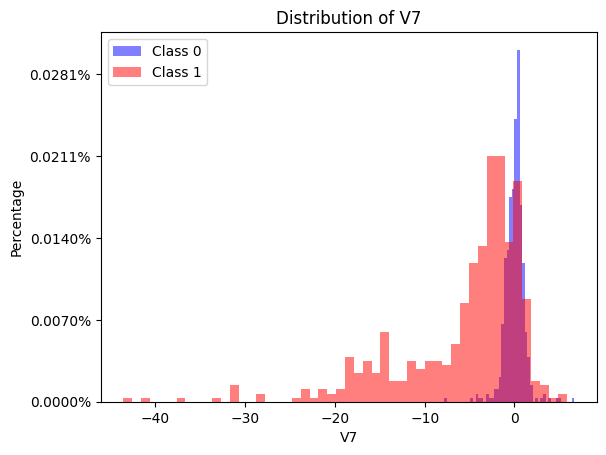

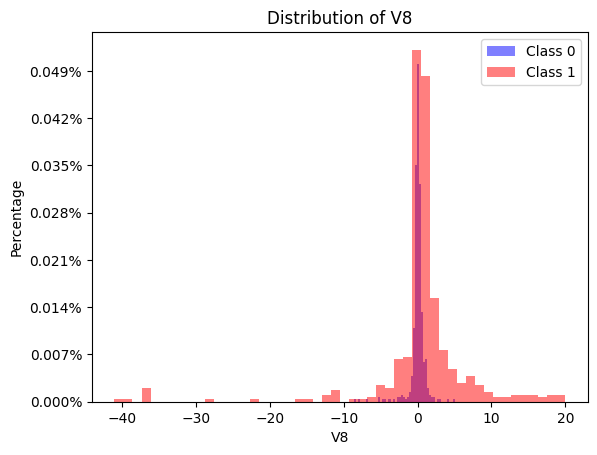

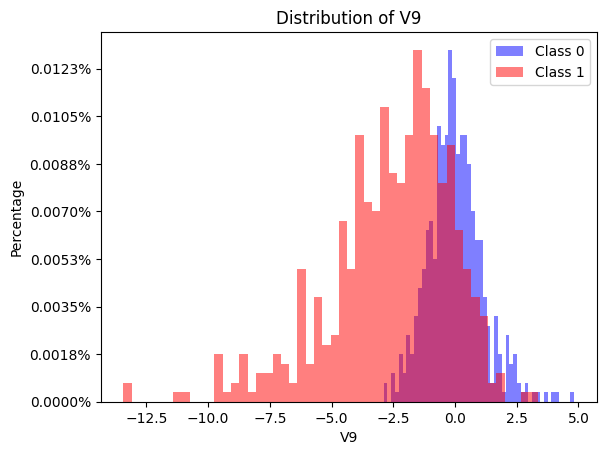

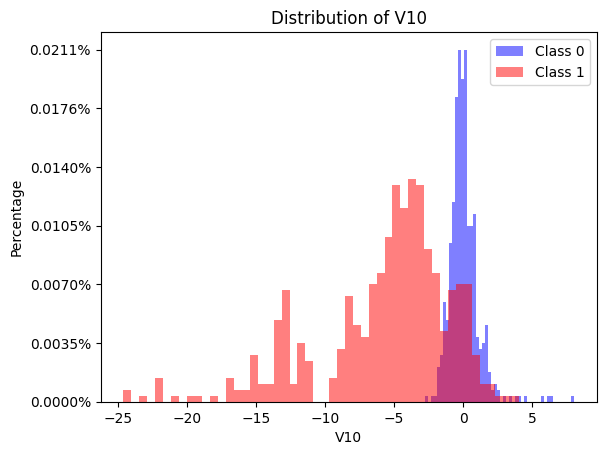

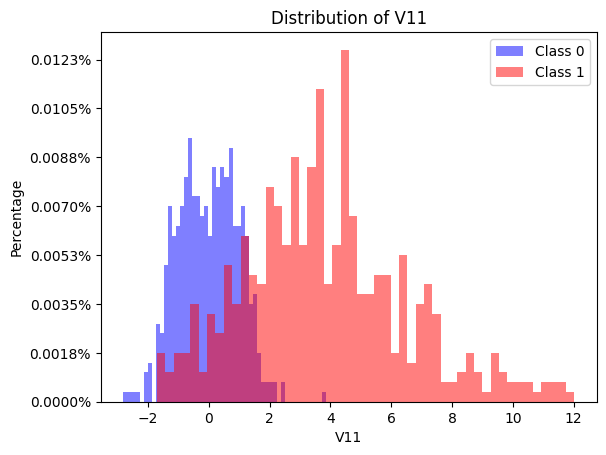

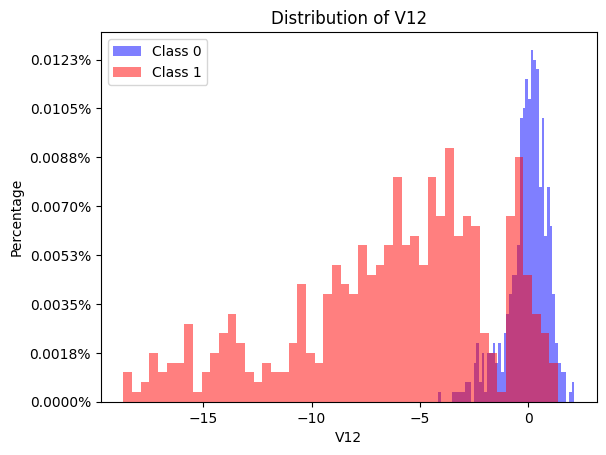

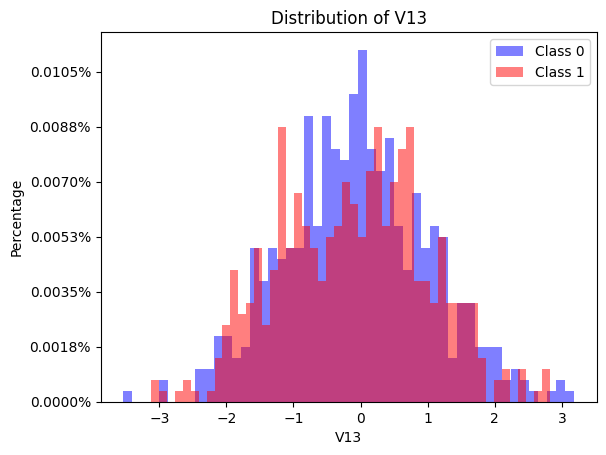

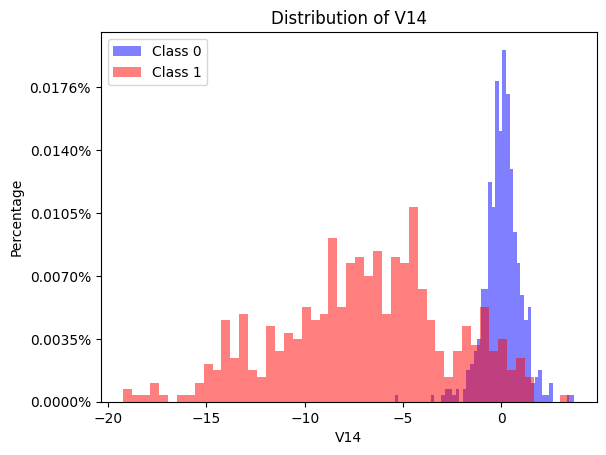

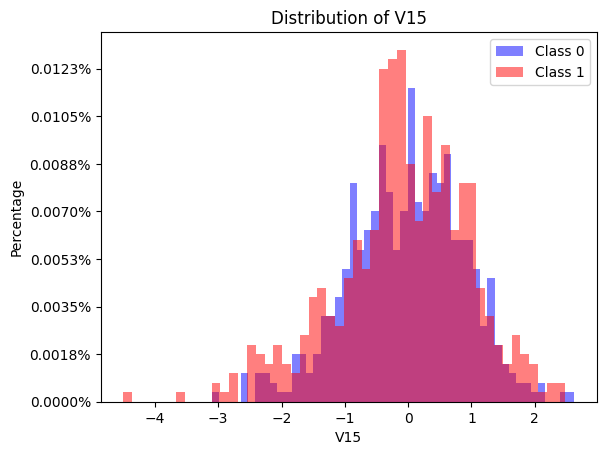

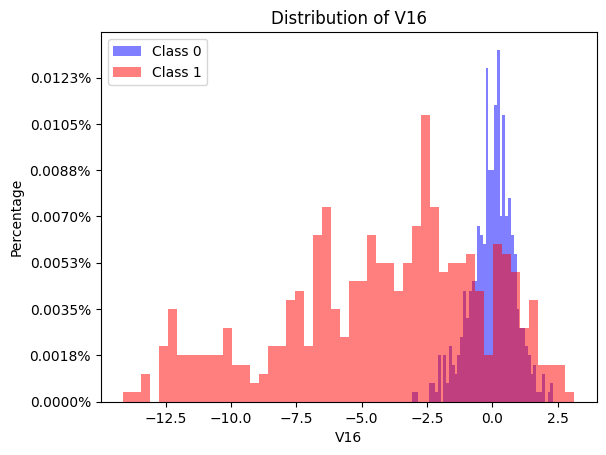

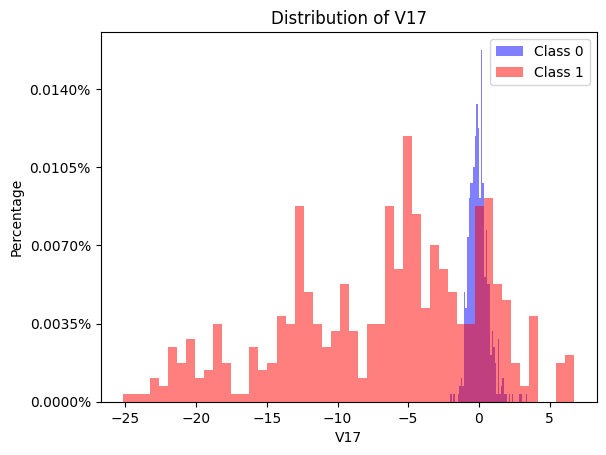

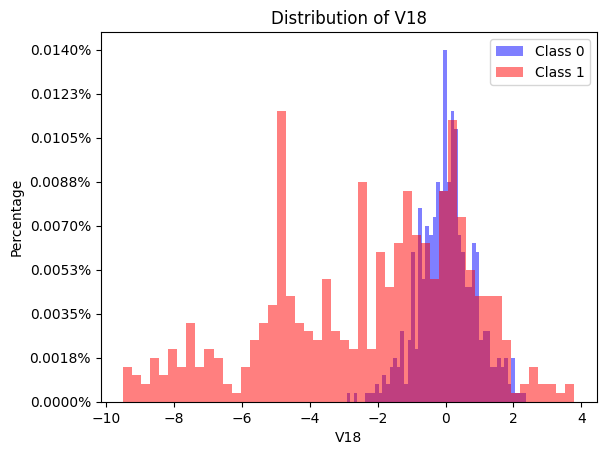

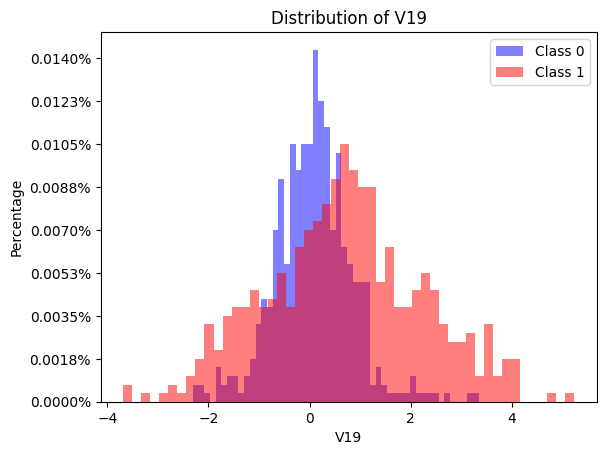

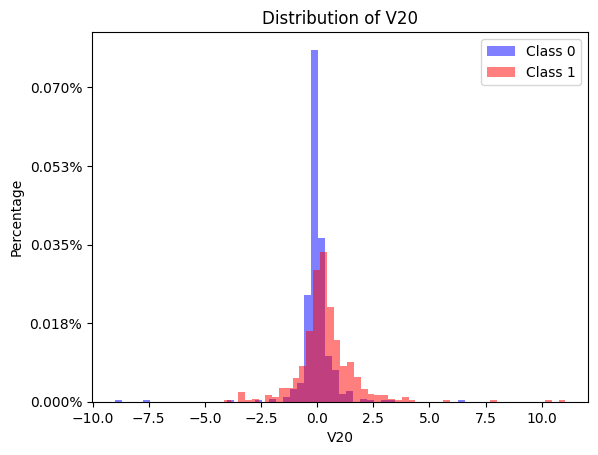

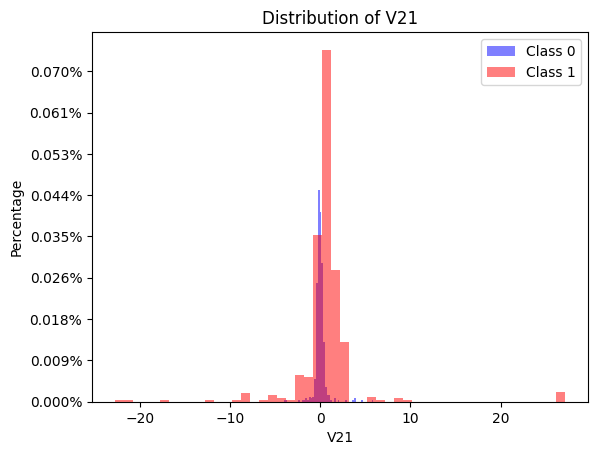

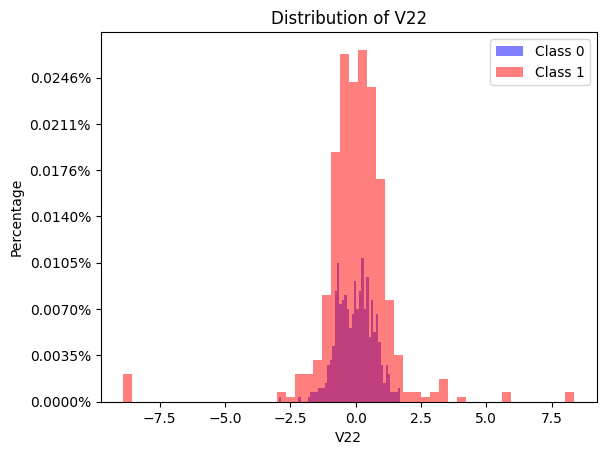

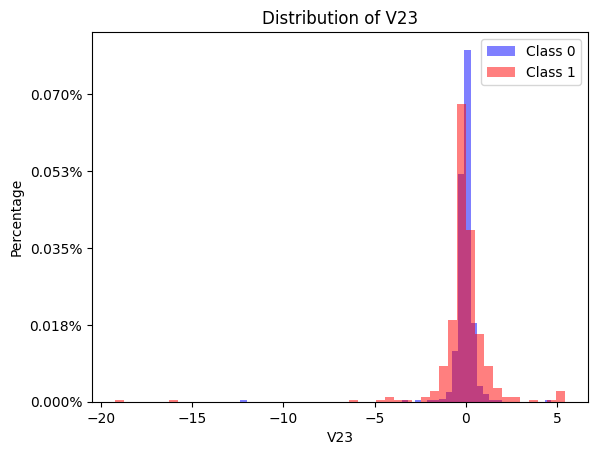

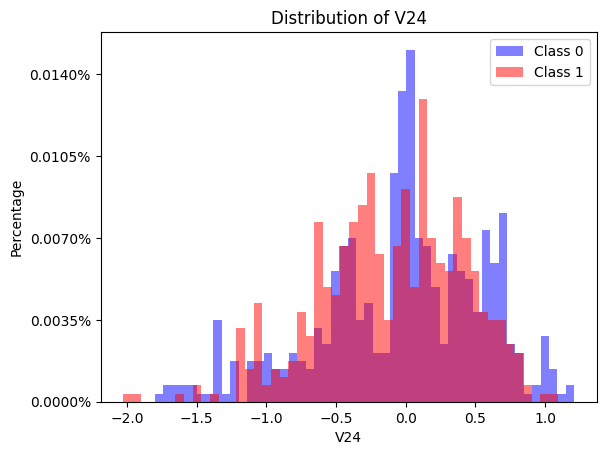

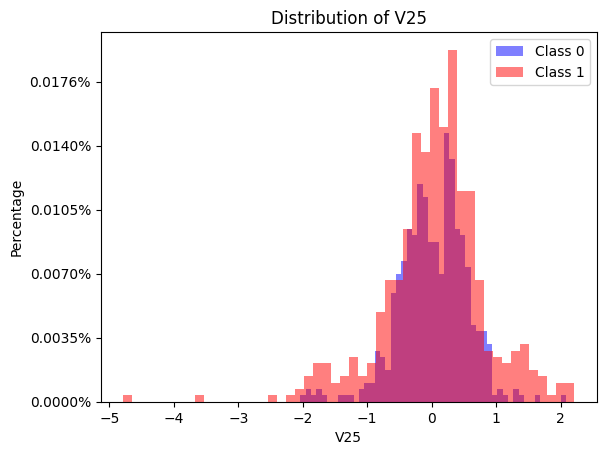

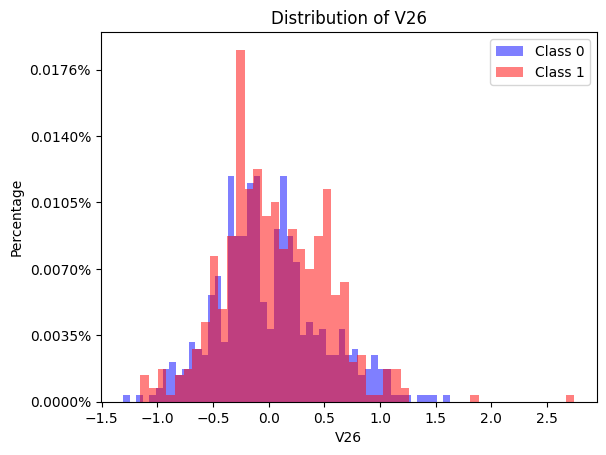

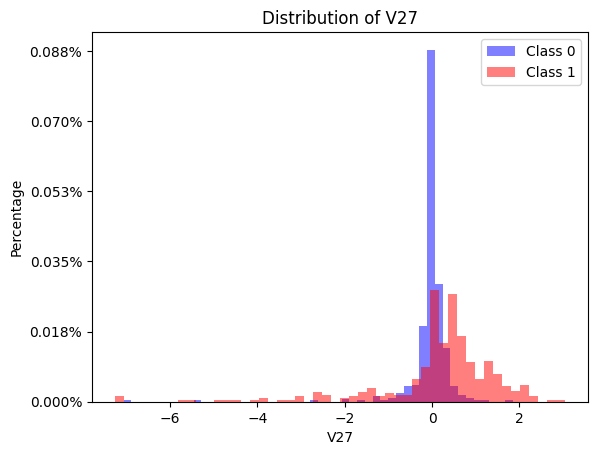

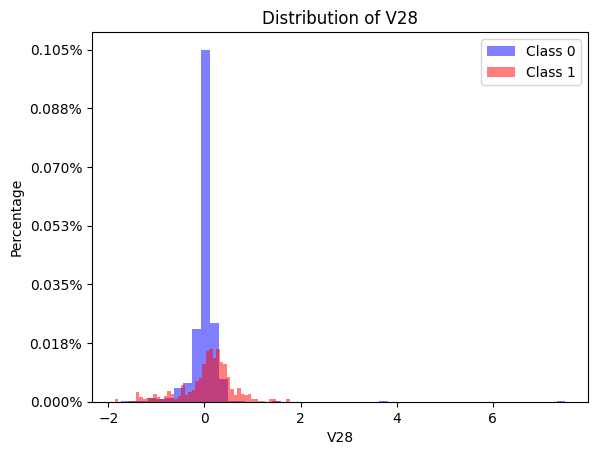

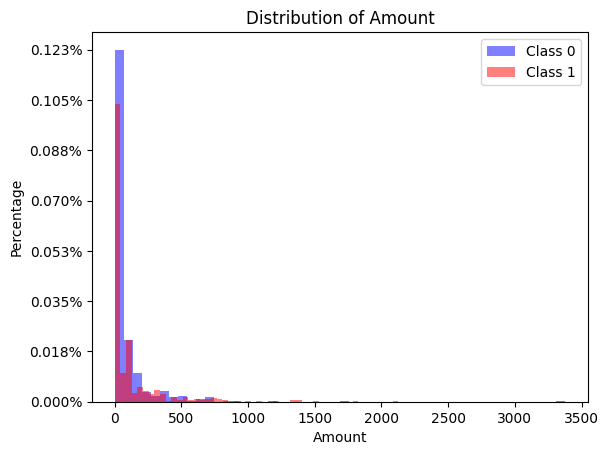

In [9]:
# 特征可视化

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# 读取CSV文件
data = pd.read_csv("creditcard.csv")


# 切分特征和标签
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']
# print(X)
# print(y)
 
# 下采样，使得两个样本同样少
# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])# 计算异常样本的个数
fraud_indices = np.array(data[data.Class == 1].index) # 异常样本在原数据的索引值
 
# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index # 获得原数据正常样本的索引值
 
# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False) # 通过索引进行随机的选择
random_normal_indices = np.array(random_normal_indices)
 
# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices]) # 将class=1和class=0 的选出来的索引值进行合并
 
# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]
 
X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']


# 分割两类数据
class_0 = under_sample_data[under_sample_data["Class"] == 0]
class_1 = under_sample_data[under_sample_data["Class"] == 1]

# 提取特征列
features = data.columns[:-1]  # 最后一列是标签列

# 绘制特征分布图
for feature in features:
    plt.figure()
    plt.hist(class_0[feature], bins=50, color='blue', alpha=0.5, label='Class 0')
    plt.hist(class_1[feature], bins=50, color='red', alpha=0.5, label='Class 1')
    plt.xlabel(feature)
    plt.ylabel('Percentage')
    plt.title(f'Distribution of {feature}')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=len(data)))
    plt.legend()
    plt.show()

In [1]:
# 特征重要性分析

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# 读取CSV文件
data = pd.read_csv("creditcard.csv")

# 下采样，使得两个样本同样少
# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])# 计算异常样本的个数
fraud_indices = np.array(data[data.Class == 1].index) # 异常样本在原数据的索引值
 
# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index # 获得原数据正常样本的索引值
 
# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False) # 通过索引进行随机的选择
random_normal_indices = np.array(random_normal_indices)
 
# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices]) # 将class=1和class=0 的选出来的索引值进行合并
 
# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

# 观察特征可视化后选择剔除部分特征
droplist = ['V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Time']
data_new = under_sample_data.drop(droplist, axis=1)

x = data_new.iloc[:, data_new.columns != 'Class']
y = data_new.iloc[:, data_new.columns == 'Class']
clf = RandomForestClassifier(n_estimators=10, random_state=123, max_depth=4)
clf.fit(x, y)
for feature in zip(x, clf.feature_importances_):
    print(feature)

('V1', 0.0008704964451587603)
('V2', 0.004858073248048315)
('V3', 0.012053803127792528)
('V4', 0.24002193034831804)
('V5', 0.0011584316341103054)
('V6', 0.003497625792960829)
('V7', 0.01644161824969729)
('V9', 0.006082836743914549)
('V10', 0.2943813835824588)
('V11', 0.09131459637394938)
('V12', 0.07792805536235262)
('V14', 0.20385707760579477)
('V16', 0.008253213577254285)
('V17', 0.01659184366841161)
('V18', 0.009695405591667141)
('V19', 0.0069469236068516625)
('Amount', 0.0060466850412590895)


/home/orion/share/coding/creditcard-fraud-monitor/.venv/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv("creditcard.csv")

number_records_fraud = len(data[data.Class == 1])# 计算异常样本的个数
fraud_indices = np.array(data[data.Class == 1].index) # 异常样本在原数据的索引值

normal_indices = data[data.Class == 0].index # 获得原数据正常样本的索引值
 
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False) # 通过索引进行随机的选择
random_normal_indices = np.array(random_normal_indices)

under_sample_indices = np.concatenate([fraud_indices,random_normal_indices]) # 将class=1和class=0 的选出来的索引值进行合并

under_sample_data = data.iloc[under_sample_indices,:]

under_sample_data.to_csv("creditcard-decimation.csv", index=False)